In [30]:
import lsst.afw.table as afwTable
from astropy.table import Table
import sncosmo

In [ ]:
def build_lightcurve(source_list):
    """
    Assemble a light curve data table from available files.
    """

    bandpasses = ['r']


    lightcurve = {}
    lightcurve['bandpass'] = []
    lightcurve['mjd'] = []
    lightcurve['ra'] = []
    lightcurve['dec'] = []
    lightcurve['flux'] = []
    lightcurve['flux_error'] = []
    lightcurve['zp'] = []
    lightcurve['zpsys'] = []
    lightcurve['visits'] = []

    for visit, src in source_list:

        #print 'yep',visit
        lightcurve['bandpass'].append(str('sdss' + bandpasses[0]))
        lightcurve['mjd'].append(src['visit'])
        lightcurve['ra'].append(src['coord_ra'])
        lightcurve['dec'].append(src['coord_dec'])
        lightcurve['flux'].append(src['base_PeakLikelihoodFlux_flux'])
        lightcurve['flux_error'].append(src['base_PeakLikelihoodFlux_fluxSigma'])
        lightcurve['visits'].append(src['visit'])
        #lightcurve['flux'].append(src['base_CircularApertureFlux_12_0_flux'])
        #lightcurve['flux_error'].append(src['base_CircularApertureFlux_12_0_fluxSigma'])
        lightcurve['zp'].append(25.0)
        lightcurve['zpsys'].append('ab')
    lightcurve = Table(data=lightcurve)
    return lightcurve

In [2]:
catalog = afwTable.SourceCatalog.readFits("/renoir_data_02/jpreyes/lsst_data/Light_curves.fits" )

In [7]:
light_curves=[]
i = 0
current = -1

while i < len(catalog):
    result = catalog[i]
    if current == -1 or current != result['object']:
        lc = [((result['visit']),result)]
        light_curves.append(lc)
        current = result['object']
    else:
        light_curves[-1].append(((result['visit']),result))
    i+=1


In [27]:
for lc in light_curves:
    if len(lc) > 3:
        sncosmo_lc = build_lightcurve(lc)
        break

In [28]:
sncosmo_lc

mjd,visits,zpsys,flux,ra,flux_error,dec,zp,bandpass
int64,int64,str2,float64,object,float64,object,float64,str5
852890,852890,ab,611218.671992,3.74551 rad,7323.10797293,0.923084 rad,25.0,sdssr
850586,850586,ab,1293287.35254,3.74551 rad,6724.78009046,0.923085 rad,25.0,sdssr
850180,850180,ab,386008.518491,3.74551 rad,8146.31612406,0.92308 rad,25.0,sdssr
849374,849374,ab,2593152.14389,3.7455 rad,15386.790961,0.923086 rad,25.0,sdssr


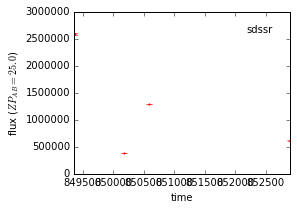

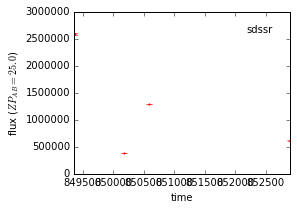

In [32]:
%matplotlib inline
sncosmo.plot_lc(sncosmo_lc, color="RED")